# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.


In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('previsao_de_renda.csv')

In [31]:
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [35]:
# reduzo o dataframe para as variaveis numericas

colunas_numericas = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

df = df[colunas_numericas]

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

<Figure size 200x200 with 0 Axes>

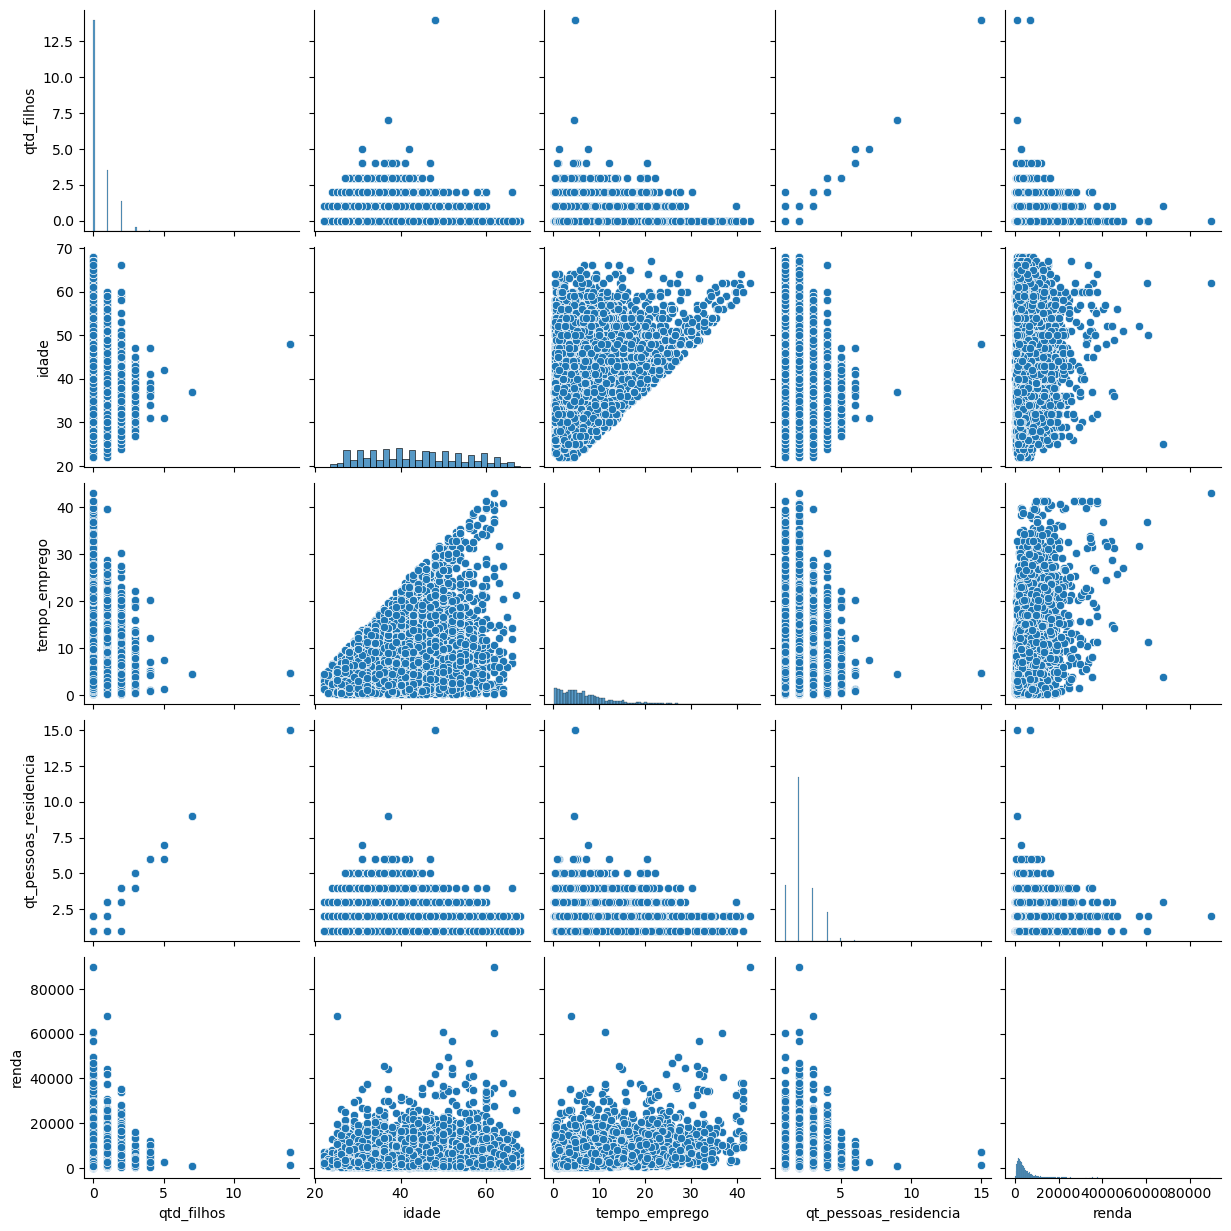

In [44]:
# gráfico de dispersão

plt.figure( figsize=[2,2] )

sns.pairplot(data = df)

plt.show()

In [48]:
# matriz de correlação

matriz_correl = df.corr()
matriz_correl

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


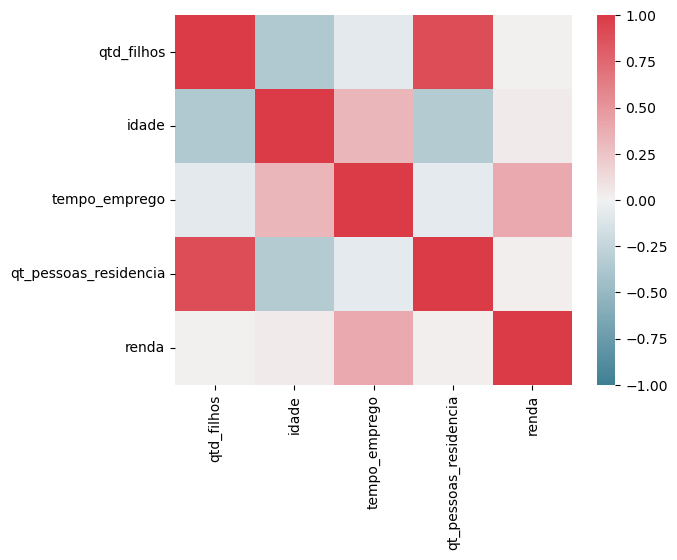

In [56]:
plt.close('all')

# paleta de cores [-1, 0, +1] = [azul_claro, branco, vermelho]
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data = matriz_correl, vmin = -1, vmax = +1, center=0, cmap=cmap)

plt.show()

### Obs:

* nota-se que as variaveis que tem mais correlação são 'qtde_filhos' e 'qt_pessoas_residencia', com uma correlação de quase 90%.
* relacionado a nossa variavel de interesse 'renda', a que parece ter a maior correlação é a 'tempo_emprego', com quase 40% de correlação. Em segundo lugar 'idade', com apenas 4% de correlação.


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

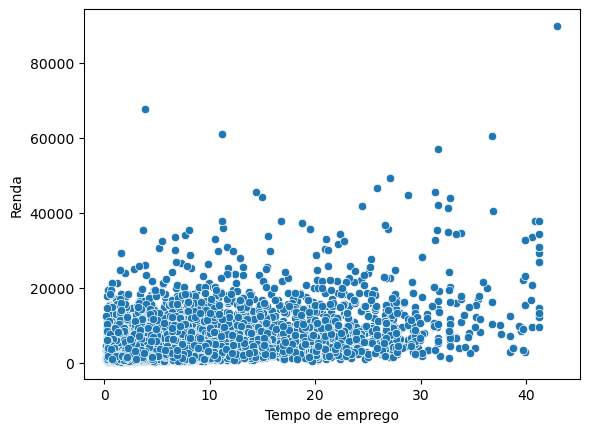

In [69]:
# scatterplot 'renda' x 'tempo_emprego'

plt.close('all')

plt.figure()

ax = sns.scatterplot(data = df, x = df['tempo_emprego'], y = df['renda'])

ax.set_xlabel('Tempo de emprego')
ax.set_ylabel('Renda')

plt.show()

3) Na sua opinião, há outliers na variável renda?

* sim, há outliers na 'renda'.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [73]:
df['log_renda'] = np.log( df['renda'] )

df.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_renda,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

* Piorou. Visto que a correlação de 'renda' x 'tempo_emprego' é de 39% e a de 'log_renda' x 'tempo_emprego' quase 37%